## Adquisición y preprocesamiento de la información

<table>
    <tr>
      <td>Grado en Ingeniería de Datos e Inteligencia Artificial - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>




# Conversión de datos categóricos

### Índice
[Introducción](#Intro)<br>
[Nulos](#Nulos)<br>
[Tipos](#Tipos)<br>
[Variables binarias](#Binarias)<br>
[One-Hot Encoding](#One)<br>
[Labeling](#Labeling)<br>
[Bibliografía](#Bibliografía)<br>

<a name="Intro"></a>
#### Introducción
En muchos algoritmo de inteligencia artificial vamos a necesitar que todos los datos sean numéricos, y más en particular valores sobre los que tenga sentido medir distancias. Por ello una labor importante tras finalizar todos los pasos de limpieza básicos (tratar nulos, duplicados, outliers, hacer giros y agrupar si hace falta, realizar estadísticas básicas, etc.) será convertir las columnas nominales u ordinales (tengan representación numérica o no) a columnas de tipo intervalo/ratio. 

El método preferido será el conocido como one-hot-encoding porque preserva las distancias 

<img src="https://i.imgur.com/mtimFxh.png" />

Veamos un [ejemplo](https://pbpython.com/categorical-encoding.html):

In [102]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
cabeceras = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]
df = pd.read_csv(url,header=None, names=cabeceras)
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<a name="Nulos"></a>
#### Nulos

En este cuardeno no vamos a tratar los nulos en profundidad, solo echamos un vistazo y hacemos lo más sencillo.
Parece que el valor ? significa valor desconocido, vamos a convertirlo en NA. Primero miramos cuántos hay

In [103]:
(df=='?').sum().sum()

59

In [104]:
df2 = df.replace('?',pd.NA)
print(df2.shape)
df2.info()

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size     

In [105]:
df2.isna().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [106]:
#pip install missingno

<AxesSubplot: >

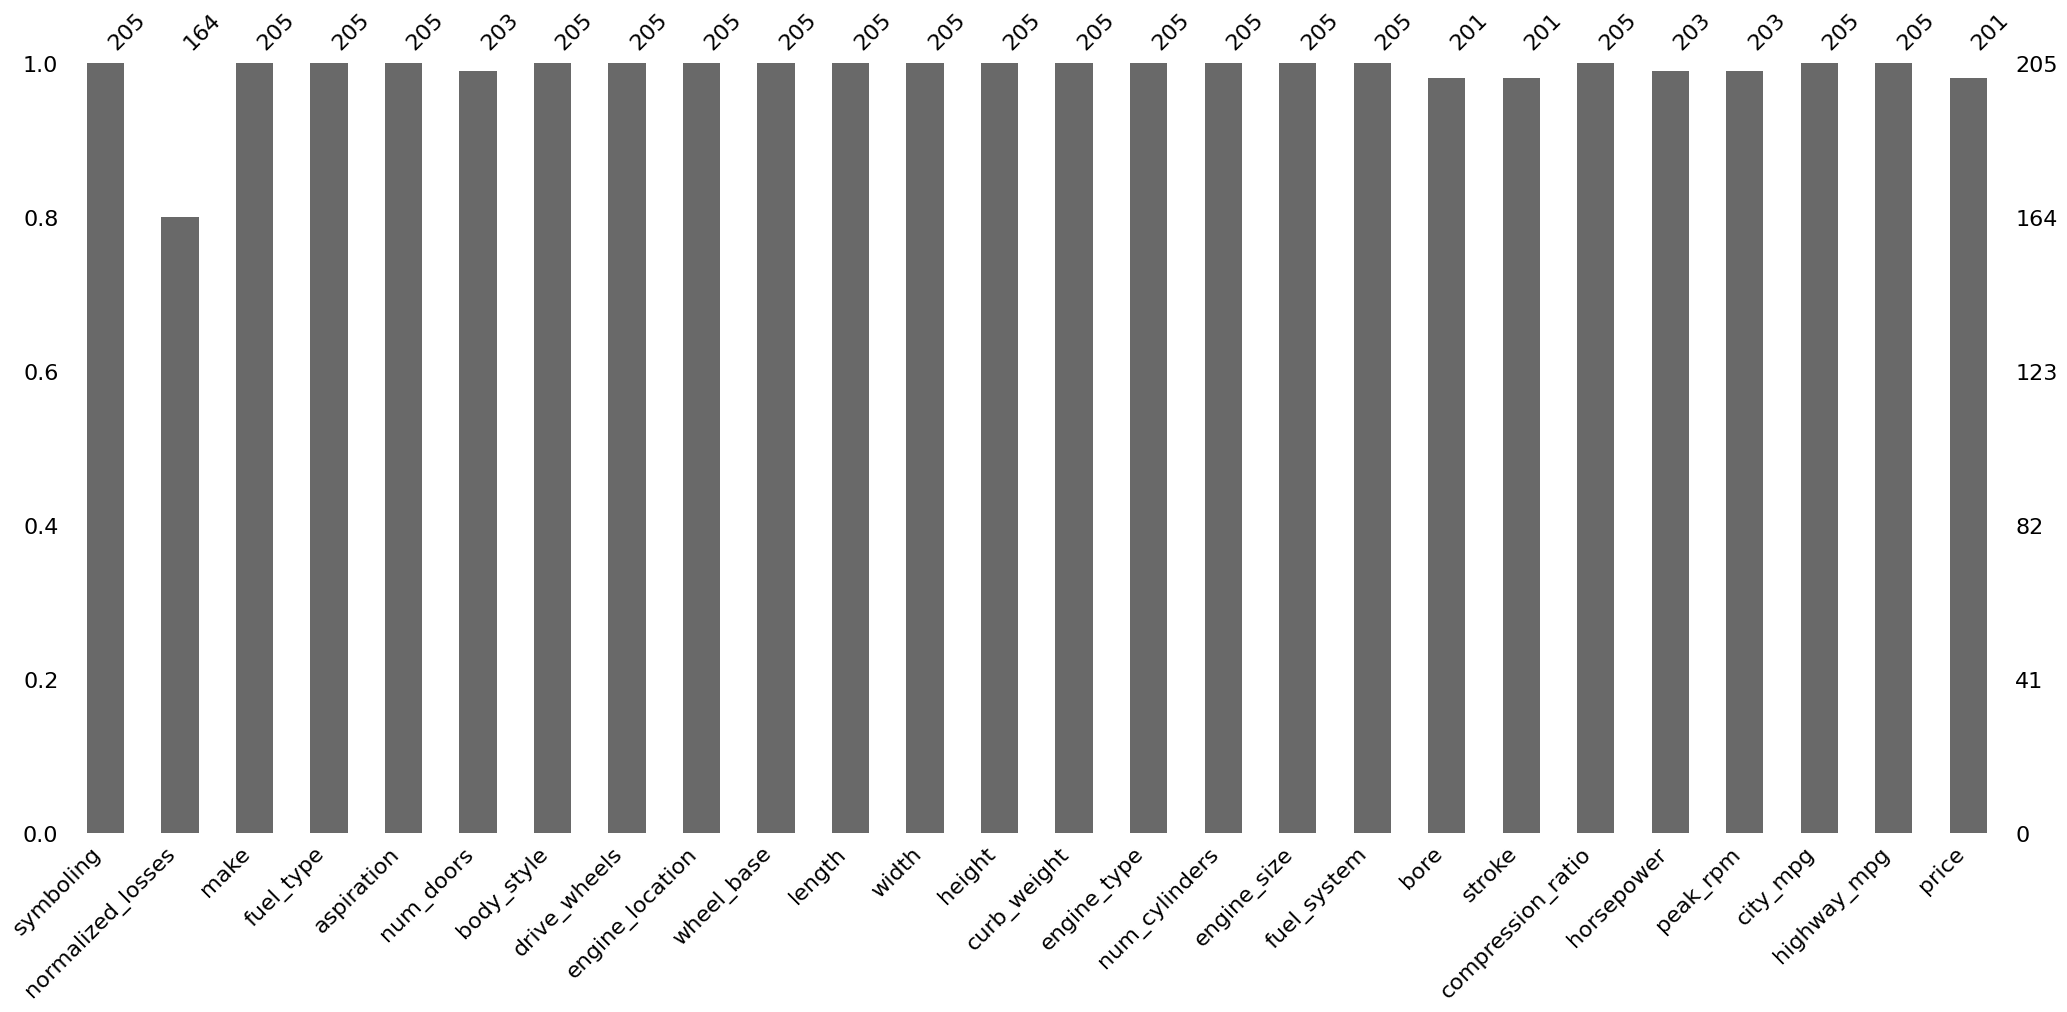

In [107]:
import seaborn as sns
import missingno as msno
%matplotlib inline

msno.bar(df2)

<AxesSubplot: >

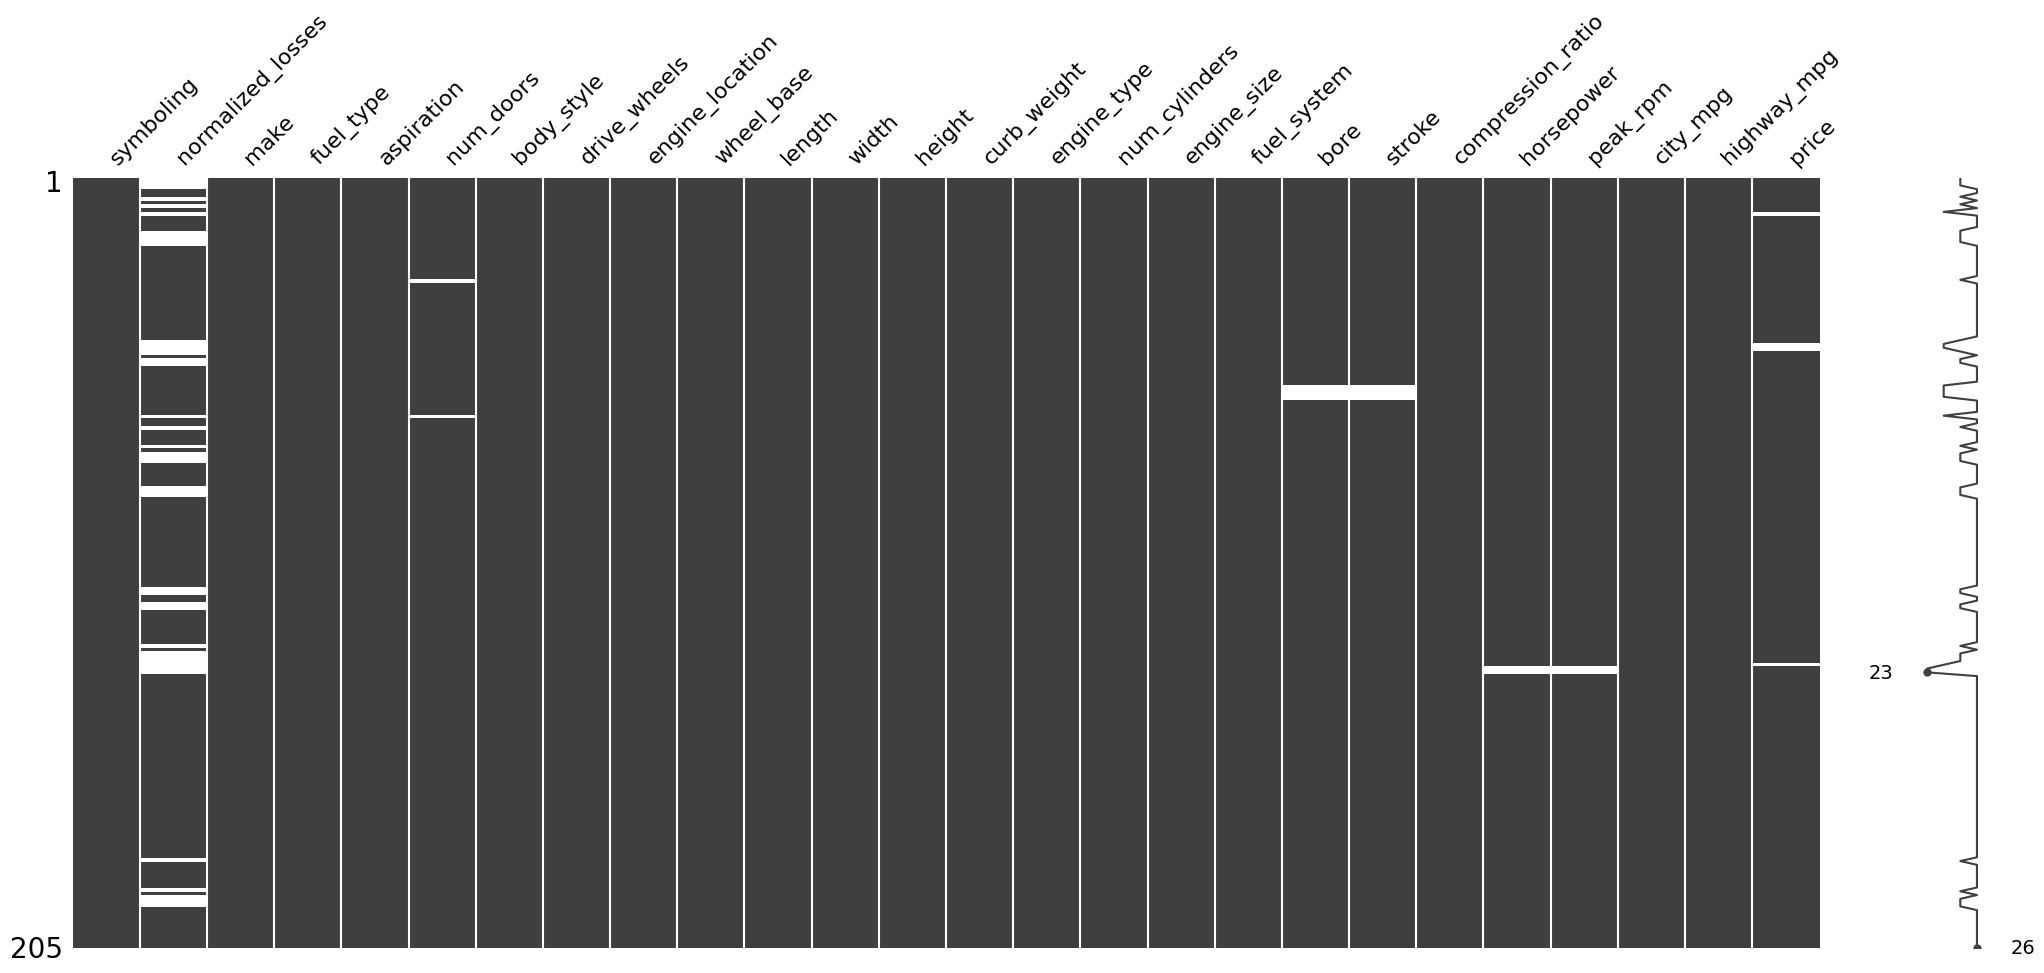

In [108]:
msno.matrix(df2)

Como solución sencilla borramos la columna `normalized_loses` y luego las filas que tengan algún nulo (esto no es nada "fino" pero vale para nuestro propósito)

<AxesSubplot: >

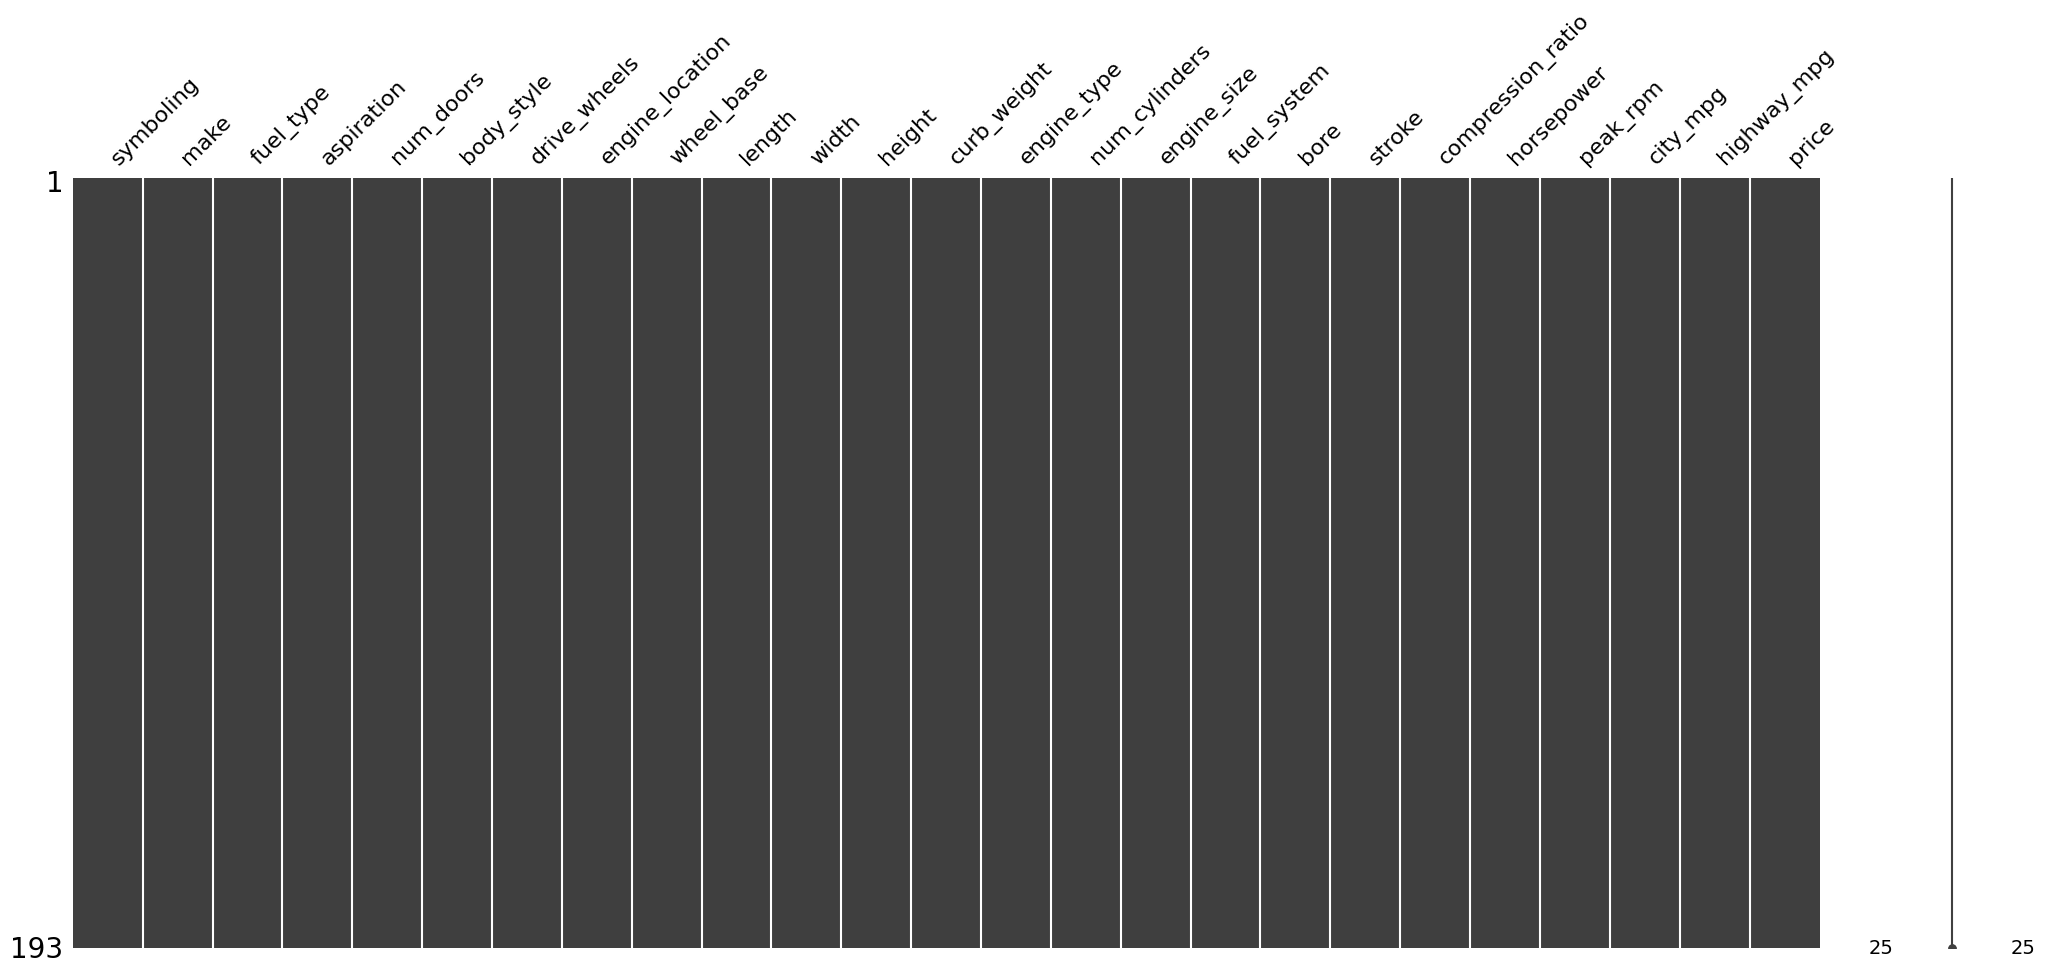

In [109]:
df3 = df2.drop(columns=["normalized_losses"]).dropna()
msno.matrix(df3)

<a name="Tipos"></a>
#### Tipos

Vamos a ver de qué tipo es cada columna ya que aquí estamos sobre todo interesados en las nominales/ordinales. Pero antes vamos a usar un "truco" para simplicar esta tarea:

- Algunos valores numéricos pueden haberse leído como strings por culpa de los nulos
- Una forma sencilla de convertir es simplemente grabarlo como csv y volver a leer porque así pandas hace la inferencia automática

In [110]:
from pathlib import Path
path = Path.cwd()  
path_procesado = Path(path,"procesado")
path_procesado.mkdir(exist_ok=True)
fichero = Path(path_procesado,"sin_nulos.csv")

df3.to_csv(fichero,index=False)
df3 = pd.read_csv(fichero)

In [111]:
numericas = df3.select_dtypes("number")
numericas

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
189,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
190,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
191,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


symboling parece nominal, buscando información sobre esta columna encontramos:  
*A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.*

In [112]:
df3.symboling.value_counts()

 0    63
 1    51
 2    31
 3    23
-1    22
-2     3
Name: symboling, dtype: int64

In [113]:
s = set(df3.columns).difference(set(numericas.columns))
columnas = list(s)

In [114]:
df3[columnas]

,engine_location,drive_wheels,aspiration,num_doors,num_cylinders,fuel_system,body_style,engine_type,make,fuel_type
0,front,rwd,std,two,four,mpfi,convertible,dohc,alfa-romero,gas
1,front,rwd,std,two,four,mpfi,convertible,dohc,alfa-romero,gas
2,front,rwd,std,two,six,mpfi,hatchback,ohcv,alfa-romero,gas
3,front,fwd,std,four,four,mpfi,sedan,ohc,audi,gas
4,front,4wd,std,four,five,mpfi,sedan,ohc,audi,gas
...,...,...,...,...,...,...,...,...,...,...
188,front,rwd,std,four,four,mpfi,sedan,ohc,volvo,gas
189,front,rwd,turbo,four,four,mpfi,sedan,ohc,volvo,gas
190,front,rwd,std,four,six,mpfi,sedan,ohcv,volvo,gas
191,front,rwd,turbo,four,six,idi,sedan,ohc,volvo,diesel


Parece que num_doors y num_cylinders son en realidad tipo ratio, las eliminanos (como curiosidad las vamos a convertir antes)

In [115]:
!pip install word2number

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
from word2number.w2n import word_to_num

word_to_num("three")

3

In [140]:
df4 = df3.copy()
df4["num_doors"] = df3.num_doors.map(word_to_num)
df4["num_cylinders"] = df3.num_cylinders.map(word_to_num)
df4["symboling"] = "v"+df3.symboling.astype("str")
df4[["num_doors","num_cylinders","symboling"] ]

,num_doors,num_cylinders,symboling
0,2,4,v3
1,2,4,v3
2,2,6,v1
3,4,4,v2
4,4,5,v2
...,...,...,...
188,4,4,v-1
189,4,4,v-1
190,4,6,v-1
191,4,6,v-1


<a name="Binarias"></a>
#### Variables binarias

¿Hemos acabado seleccionando variables nominales para transformarlas? Casi, casi, pero aun se puede mirar algo...qué columnas toman solo 2 valores

In [141]:
numericas = df4.select_dtypes(include=["number"])
s = set(df4.columns).difference(set(numericas))
columnas = list(s)
for c in columnas:
    print(c,len(df4[c].unique()))


engine_location 2
drive_wheels 3
aspiration 2
fuel_system 7
engine_type 5
body_style 5
symboling 6
make 21
fuel_type 2


Las variables que tiene solo 2 valores no necesitan one-hot-encoding, las podemos transformar directamente en 0 y 1


In [142]:
df5 = df4.copy()
transformados = []
for c in columnas:
    valores = df4[c].unique()
    if len(valores) == 2:
        # vamos a construir un diccionario con los dos valores a 0 y a 1
        df5[c] = df4[c].replace({valores[0]:0, valores[1]:1})
        transformados.append([c,valores[0],valores[1]])
df5        

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,v3,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,v3,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,v1,alfa-romero,0,0,2,hatchback,rwd,0,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,v2,audi,0,0,4,sedan,fwd,0,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,v2,audi,0,0,4,sedan,4wd,0,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,v-1,volvo,0,0,4,sedan,rwd,0,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
189,v-1,volvo,0,1,4,sedan,rwd,0,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
190,v-1,volvo,0,0,4,sedan,rwd,0,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
191,v-1,volvo,1,1,4,sedan,rwd,0,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Resulta útil guardar los valore transformados por si luego hay que hacer la transformación inversa

In [143]:
df_transformados = pd.DataFrame(data=transformados,columns=["columna","valor0","valor1"])
df_transformados

,columna,valor0,valor1
0,engine_location,front,rear
1,aspiration,std,turbo
2,fuel_type,gas,diesel


In [145]:
file_binarias = Path(path_procesado,"binarias.csv")
df_transformados.to_csv(file_binarias,index=False)

Usamos el mismo truco de grabar y leer para recuperar los tipos


In [146]:

fichero = Path(path_procesado,"con_binarias.csv")

df5.to_csv(fichero,index=False)
df5 = pd.read_csv(fichero)
df5

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,v3,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,v3,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,v1,alfa-romero,0,0,2,hatchback,rwd,0,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,v2,audi,0,0,4,sedan,fwd,0,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,v2,audi,0,0,4,sedan,4wd,0,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,v-1,volvo,0,0,4,sedan,rwd,0,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
189,v-1,volvo,0,1,4,sedan,rwd,0,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
190,v-1,volvo,0,0,4,sedan,rwd,0,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
191,v-1,volvo,1,1,4,sedan,rwd,0,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<a name="One"></a>
#### One-Hot Encoding

¡Por fin! Vamos a aplicar el método one-hot-encoding

In [152]:
nominales = df5.select_dtypes(exclude='bool').select_dtypes(exclude='number')
nominales

,symboling,make,body_style,drive_wheels,engine_type,fuel_system
0,v3,alfa-romero,convertible,rwd,dohc,mpfi
1,v3,alfa-romero,convertible,rwd,dohc,mpfi
2,v1,alfa-romero,hatchback,rwd,ohcv,mpfi
3,v2,audi,sedan,fwd,ohc,mpfi
4,v2,audi,sedan,4wd,ohc,mpfi
...,...,...,...,...,...,...
188,v-1,volvo,sedan,rwd,ohc,mpfi
189,v-1,volvo,sedan,rwd,ohc,mpfi
190,v-1,volvo,sedan,rwd,ohcv,mpfi
191,v-1,volvo,sedan,rwd,ohc,idi


In [154]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)  # 1 método
enc.fit(nominales)  #  2 el método "aprende"
salida = enc.transform(nominales) # 3 aplicamos el método
salida

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

Afortunadamente es fácil convertir esta matriz en un dataframe

In [155]:
encoded_df = pd.DataFrame(
     salida, 
     columns=enc.get_feature_names_out()
)
encoded_df

,symboling_v-1,symboling_v-2,symboling_v0,symboling_v1,symboling_v2,symboling_v3,make_alfa-romero,make_audi,make_bmw,make_chevrolet,...,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
190,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
191,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Ahora juntamos todo: por un lado el dataframe restringido a las columnas que no se han visto afectadas por el one-hot-encoding y por otro el resultado del one-hot-encoding

In [160]:
resto_cs = list(set(df5.columns).difference(set(nominales.columns)))
final = pd.concat([df5[resto_cs],encoded_df],axis=1)
final

,height,num_doors,price,engine_size,engine_location,num_cylinders,horsepower,curb_weight,bore,width,...,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,48.8,2,13495,130,0,4,111,2548,3.47,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,48.8,2,16500,130,0,4,111,2548,3.47,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,52.4,2,16500,152,0,6,154,2823,2.68,65.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,54.3,4,13950,109,0,4,102,2337,3.19,66.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,54.3,4,17450,136,0,5,115,2824,3.19,66.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,55.5,4,16845,141,0,4,114,2952,3.78,68.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
189,55.5,4,19045,141,0,4,160,3049,3.78,68.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
190,55.5,4,21485,173,0,6,134,3012,3.58,68.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
191,55.5,4,22470,145,0,6,106,3217,3.01,68.9,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Nota sobre **correlaciones y variables nominales**:


 En el caso de variables nominales es muy habitual la secuencia:
1) Buscar asociaciones con  $\mathcal{X}^2$ entre variables nominales, nos dice si hay alguna asociación pero no entre qué valores
2) Convertir a variables dummy con one-hot-encoding
3) Repetir las correlaciones, ahora ya como variables numéricas con `corr()`que nos mostrará posibles correlaciones con otras variables ratio y entre sí, pero ahora entre valores individuales de la variable nominal y distinguiendo entre correlación positiva y negativa


<a name="Labeling"></a>
#### Labeling

Hay veces que no hace falta complicarse tanto. 


Por ejemplo si es una variable a prededecir (la y):
    1.- no queremos transformarla en varias 
    2.- No se van a calcular distancias con ellas
    

Otra caso es cuando el método a utilizar no es de naturaleza geométrica (árboles de decisión por ejemplo).

En este caso podemos usar un label encoder. Por ejemplo supongamos que quiero codificar la columna `make`

In [161]:
df5

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,v3,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,v3,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,v1,alfa-romero,0,0,2,hatchback,rwd,0,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,v2,audi,0,0,4,sedan,fwd,0,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,v2,audi,0,0,4,sedan,4wd,0,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,v-1,volvo,0,0,4,sedan,rwd,0,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
189,v-1,volvo,0,1,4,sedan,rwd,0,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
190,v-1,volvo,0,0,4,sedan,rwd,0,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
191,v-1,volvo,1,1,4,sedan,rwd,0,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [164]:
from sklearn.preprocessing import LabelEncoder

df6 = df5.copy()

enc = LabelEncoder()  # 1 método
enc.fit(df5.make)  #  2 el método "aprende"
df6["make"] = enc.transform(df5.make) # 3 aplicamos el método
df6


,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,v3,0,0,0,2,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,v3,0,0,0,2,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,v1,0,0,0,2,hatchback,rwd,0,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,v2,1,0,0,4,sedan,fwd,0,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,v2,1,0,0,4,sedan,4wd,0,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,v-1,20,0,0,4,sedan,rwd,0,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
189,v-1,20,0,1,4,sedan,rwd,0,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
190,v-1,20,0,0,4,sedan,rwd,0,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
191,v-1,20,1,1,4,sedan,rwd,0,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Además tenemos la inversa a mano en cualquier momento:

In [165]:
enc.inverse_transform(df6.make)

array(['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi',
       'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw',
       'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet',
       'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge',
       'dodge', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda',
       'isuzu', 'isuzu', 'jaguar', 'jaguar', 'jaguar', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mercedes-benz', 'mercedes-benz',
       'mercedes-benz', 'mercedes-benz', 'mercedes-benz', 'mercedes-benz',
       'mercedes-benz', 'mercedes-benz', 'mercury', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'nissan',
       'nissan', 'nissan', 'ni

In [169]:
enc.inverse_transform(list(range(21)))

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)


<a name="Bibliografía"></a>
#### Bibliografía

[Otro tipo de encoders más complejos](https://pbpython.com/categorical-encoding.html)

[Comparativa de one-hot encoding y otro método get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/)